# EDA of Chest-XRays with Thorax labels

Thoracic disorders are conditions of the heart, lungs, mediastinum, esophagus, chest wall, diaphragm and great vessels.
This notebook specifically performs EDA on XRays obtained from VinBigData - kaggle

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pydicom as dicom
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns

In [3]:
from chest_xray_diagnosis import get_root_path
from chest_xray_diagnosis.data.meta import process

In [12]:
PROJECT_PATH = get_root_path()
DATA_PATH = os.path.join("/scratch", "mittal.nit", "vinbigdata-chest-xray-abnormalities-detection")
TRAIN_DATA_PATH = os.path.join(DATA_PATH, "train")
TEST_DATA_PATH = os.path.join(DATA_PATH, "test")

In [15]:
train_metadata = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
train_metadata

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [17]:
len(train_metadata["image_id"].unique())

15000

In [8]:
train_files = os.listdir(TRAIN_DATA_PATH)
test_files = os.listdir(TEST_DATA_PATH)

In [10]:
ds = dicom.dcmread(os.path.join(TRAIN_DATA_PATH, train_files[0]))

In [11]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 154
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 7705b3f3b2a3a2de67e579119f53466e
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's Age                       AS: '062Y'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0008) Number of Frames                    IS: "1"
(0028, 0010) Rows                                US: 3072
(0028, 0011) Columns                   

In [39]:
ds.items()

dict_items([((0010, 0040), (0010, 0040) Patient's Sex                       CS: ''), ((0028, 0002), (0028, 0002) Samples per Pixel                   US: 1), ((0028, 0004), (0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'), ((0028, 0010), (0028, 0010) Rows                                US: 2721), ((0028, 0011), (0028, 0011) Columns                             US: 2322), ((0028, 0030), (0028, 0030) Pixel Spacing                       DS: [0.125, 0.125]), ((0028, 0100), (0028, 0100) Bits Allocated                      US: 16), ((0028, 0101), (0028, 0101) Bits Stored                         US: 12), ((0028, 0102), (0028, 0102) High Bit                            US: 11), ((0028, 0103), (0028, 0103) Pixel Representation                US: 0), ((0028, 1050), (0028, 1050) Window Center                       DS: "1631.0"), ((0028, 1051), (0028, 1051) Window Width                        DS: "4260.0"), ((0028, 1052), (0028, 1052) Rescale Intercept                   DS: "0.0"),

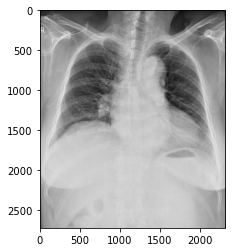

In [37]:
plt.imshow(ds.pixel_array, cmap="gray")

In [ ]:
os.listdir()

In [6]:
metadata = pd.read_csv(os.path.join(DATA_PATH, "Data_Entry_2017_v2020.csv"))
metadata.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [7]:
print(f"Number of samples: {len(metadata)}")
print(f"Number of unique image indices: {len(metadata['Image Index'].unique())}")
print(f"Number of unique patients : {len(metadata['Patient ID'].unique())}")

Number of samples: 112120
Number of unique image indices: 112120
Number of unique patients : 30805


Since, number of samples > number of unique patients, therefore for single patient we have multiple XRays.

In [8]:
metadata.set_index("Image Index", inplace=True)

In [9]:
metadata.head()

,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
Image Index,,,,,,,,,,
00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [10]:
metadata["Finding Labels"].value_counts()

No Finding                                                                 60361
Infiltration                                                                9547
Atelectasis                                                                 4215
Effusion                                                                    3955
Nodule                                                                      2705
                                                                           ...  
Emphysema|Nodule|Pleural_Thickening|Pneumothorax                               1
Atelectasis|Cardiomegaly|Consolidation|Effusion|Mass|Pleural_Thickening        1
Cardiomegaly|Edema|Effusion|Pneumonia                                          1
Atelectasis|Emphysema|Infiltration|Pneumothorax|Pneumonia                      1
Emphysema|Fibrosis|Infiltration                                                1
Name: Finding Labels, Length: 836, dtype: int64

<font color="blue">A single patient can have multiple Thorax diseases at once.

## Visualizing distribution of different labels available

In [11]:
# one hot encoding for labels
onehotlabels = process.get_dummies(
    metadata["Finding Labels"],
    validate_io_schema=True)
onehotlabels.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Image Index,,,,,,,,,,,,,,,
00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


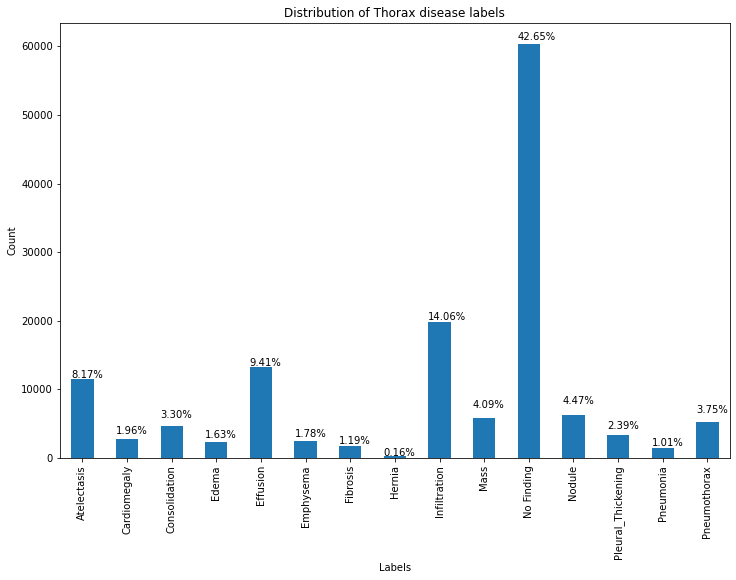

In [12]:
fig, ax = plt.subplots()
onehotlabels.sum(axis=0).plot.bar(ax=ax, figsize=(12,8))
sum_labels = onehotlabels.sum().sum()
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()*100/sum_labels:.2f}%", 
        (p.get_x()*1.0, p.get_height()*1.25 if p.get_height() < 10000 else p.get_height()*1.01), fontsize=10)

ax.set_title("Distribution of Thorax disease labels")
ax.set_ylabel("Count")
ax.set_xlabel("Labels")
plt.show()

In [13]:
metadata_with_onehotlabels = pd.merge(
    metadata,
    onehotlabels,
    left_index=True, 
    right_index=True,
    how="inner")

In [14]:
metadata_with_onehotlabels.head()

,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Image Index,,,,,,,,,,,,,,,,,,,,,
00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,...,0,0,0,0,0,0,0,0,0,0
00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,...,1,0,0,0,0,0,0,0,0,0
00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,0,0,0
00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,...,0,0,0,0,0,1,0,0,0,0
00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,...,0,0,1,0,0,0,0,0,0,0


In [15]:
dist_labels = onehotlabels.columns
dist_labels

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [16]:
dist_labels_by_gend = {}
for label in onehotlabels.columns:
    dist_labels_by_gend[label] = metadata_with_onehotlabels[
        metadata_with_onehotlabels[label]==1].groupby("Patient Gender").agg(
        {"Patient ID": pd.Series.nunique}).to_dict()["Patient ID"]
    
dist_labels_by_gend = pd.DataFrame.from_dict(dist_labels_by_gend, orient="index")
dist_labels_by_gend

,F,M
Atelectasis,2062,2919
Cardiomegaly,825,741
Consolidation,906,1244
Edema,491,582
Effusion,1973,2302
Emphysema,380,666
Fibrosis,582,678
Hernia,70,64
Infiltration,3517,4518
Mass,1063,1505


In [17]:
dist_labels_by_gend.sum(axis=0)

F    26775
M    33115
dtype: int64

In [18]:
# gender_dist = metadata[["Patient ID", "Patient Gender"]].drop_duplicates()["Patient Gender"].value_counts()


# labels_by_gender = {
#     label: {g: set() for g in gender_dist.index} for label in unique_labels.index}

# for row in tqdm(metadata[["Finding Labels", "Patient Gender", "Patient ID"]].values, leave=False):
#     for label in row[0].split("|"):
#         labels_by_gender[label][row[1]].add(row[2])

# labels_by_gender = {label: {gender: len(ids) for gender,ids in v.items()} for label,v  in labels_by_gender.items()}
        
# labels_by_gender = pd.DataFrame.from_dict(labels_by_gender, orient="index")
# labels_by_gender = labels_by_gender.div(labels_by_gender.sum(axis=1), axis=0)

In [19]:
dist_labels_by_gend.div(dist_labels_by_gend.sum(axis=1), axis=0)

,F,M
Atelectasis,0.413973,0.586027
Cardiomegaly,0.526820,0.473180
Consolidation,0.421395,0.578605
Edema,0.457596,0.542404
Effusion,0.461520,0.538480
Emphysema,0.363289,0.636711
Fibrosis,0.461905,0.538095
Hernia,0.522388,0.477612
Infiltration,0.437710,0.562290
Mass,0.413941,0.586059


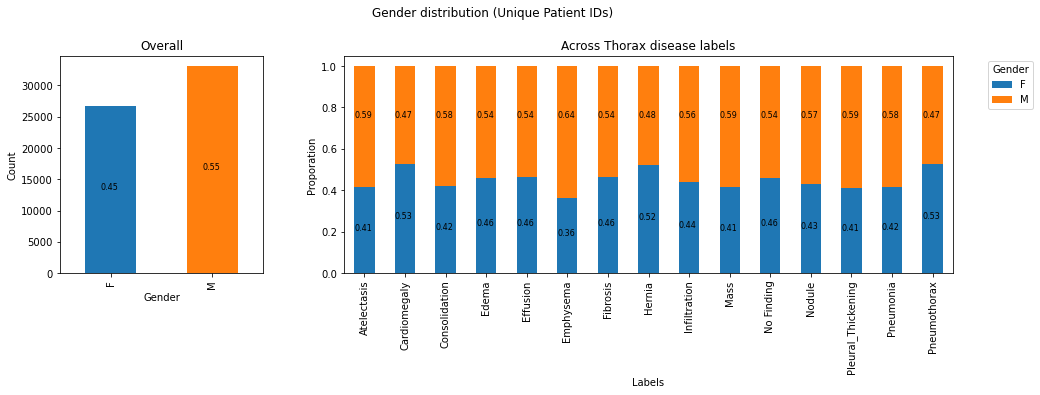

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4), gridspec_kw={'width_ratios': [1, 3]})
dist_labels_by_gend.sum().plot.bar(ax=ax1, color=['#1f77b4', '#ff7f0e'])
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height()/dist_labels_by_gend.sum().sum():.2f}", 
        (p.get_x()+.15, p.get_height() * .5),
        fontsize=8)

ax1.set_title("Overall")
ax1.set_ylabel("Count")
ax1.set_xlabel("Gender")
# ax1.set_xticks([])

ax2 = dist_labels_by_gend.div(dist_labels_by_gend.sum(axis=1), axis=0).plot.bar(stacked=True, ax=ax2)
ax2.set_title("Across Thorax disease labels")
ax2.set_ylabel("Proporation")
ax2.set_xlabel("Labels")

l = len(ax2.patches)//2
for i in range(l):
    p1, p2 = ax2.patches[i], ax2.patches[i+l]
    ax2.annotate(
        f"{p1.get_height():.2f}", (p1.get_x() * 1.00, p1.get_height() * .5), fontsize=8)
    ax2.annotate(
        f"{p2.get_height():.2f}", (p2.get_x() * 1.00, (p1.get_height() + p2.get_height()) * .75), fontsize=8)
ax2.legend(bbox_to_anchor=(1.05,1.), title="Gender")

fig.suptitle(t="Gender distribution (Unique Patient IDs)", x=.5, y=1.05, horizontalalignment="center")
plt.show()

In [21]:
num_labels = len(onehotlabels.columns)
co_ocur_labels = pd.DataFrame(
    np.zeros(
        (num_labels, num_labels), dtype=int),
    columns=onehotlabels.columns, 
    index=onehotlabels.columns)

for labels in tqdm(onehotlabels.values, leave=False):
    labels = dist_labels[labels==1]
    for i in range(len(labels)):
        for j in range(i, len(labels)):
            co_ocur_labels.loc[labels[i]][labels[j]] += 1
            if i != j: co_ocur_labels.loc[labels[j]][labels[i]] += 1

In [22]:
assert np.allclose(co_ocur_labels.values.diagonal(), onehotlabels.sum(axis=0).values)

In [23]:
mask = np.zeros_like(co_ocur_labels.values, dtype=np.bool)
mask[np.triu_indices_from(co_ocur_labels.values)] = True

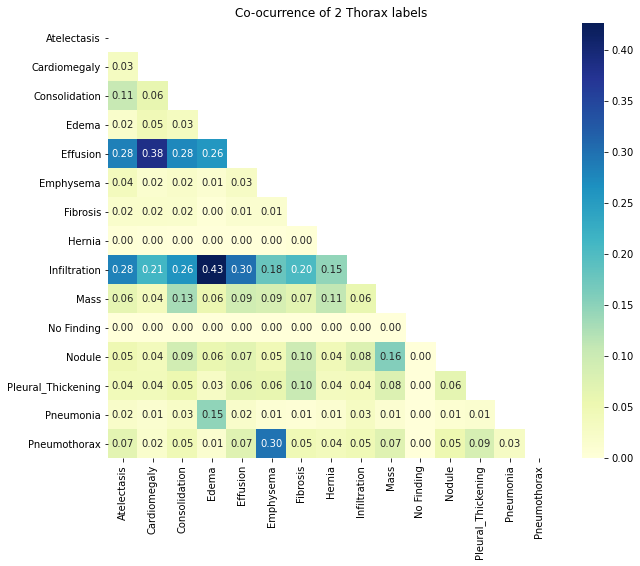

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(co_ocur_labels/co_ocur_labels.max(axis=1), ax=ax, cmap="YlGnBu", mask=mask, annot=True, fmt=".2f")
ax.set_title("Co-ocurrence of 2 Thorax labels")
plt.show()

In [26]:
metadata_with_onehotlabels["View Position"].value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64

In [ ]:
value_counts